In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('seaborn')

In [3]:
df_mpi = pd.read_csv('kiva_mpi_region_locations.csv') # Набор данных, содержащий данные о регинах и показатели MPI
df_loans = pd.read_csv('kiva_loans.csv')  # Набор данных, который содержит большую часть информации о займах

In [4]:
# Расширьте полученный отчет исследованием следующих вопросов:

In [5]:
# определяем группы
def f(x):
    if x == 'female':
        return 'female'
    if x == 'male':
        return 'male'
    if x != 'male' or 'female':
        return 'group'


df_loans['gender'] = df_loans['borrower_genders'].apply(f)
df_gender = df_loans[['country','gender']]

## Объединяем таблицы
data = pd.merge(left = df_loans, right = df_mpi, on = 'country')

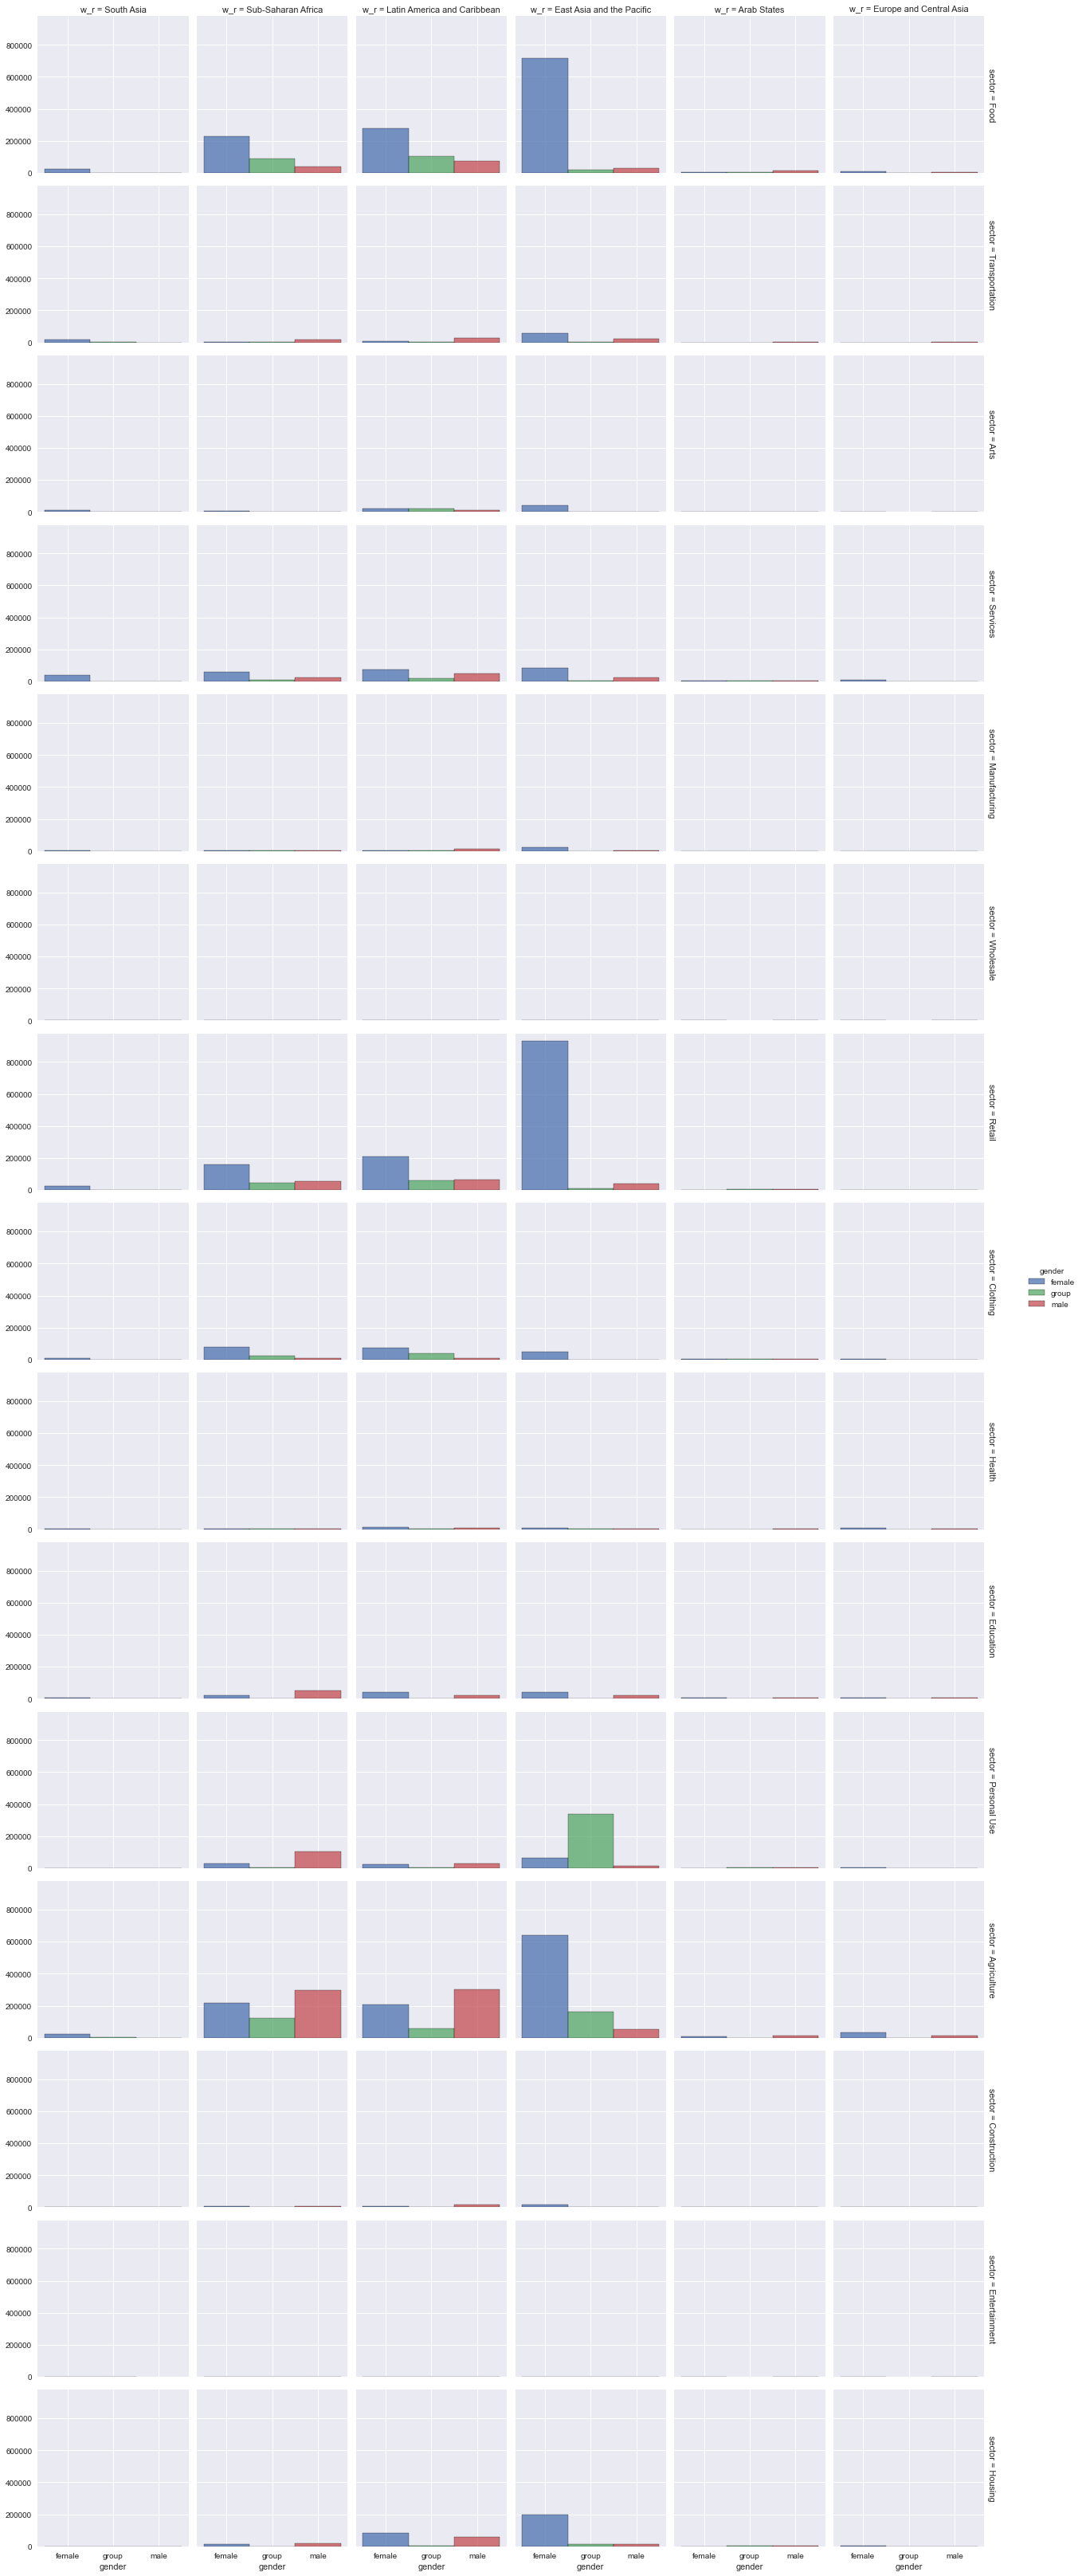

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Зависимость пола заемщика от региона планеты, сектора экономики.

data_1 = data[['world_region','sector','gender']]
data_1['w_r'] = data_1['world_region']

g = sns.FacetGrid(data_1, col = 'w_r', row = 'sector', hue = 'gender', margin_titles=True, despine=False)
g.map(sns.histplot, 'gender')

g.add_legend()

plt.show()

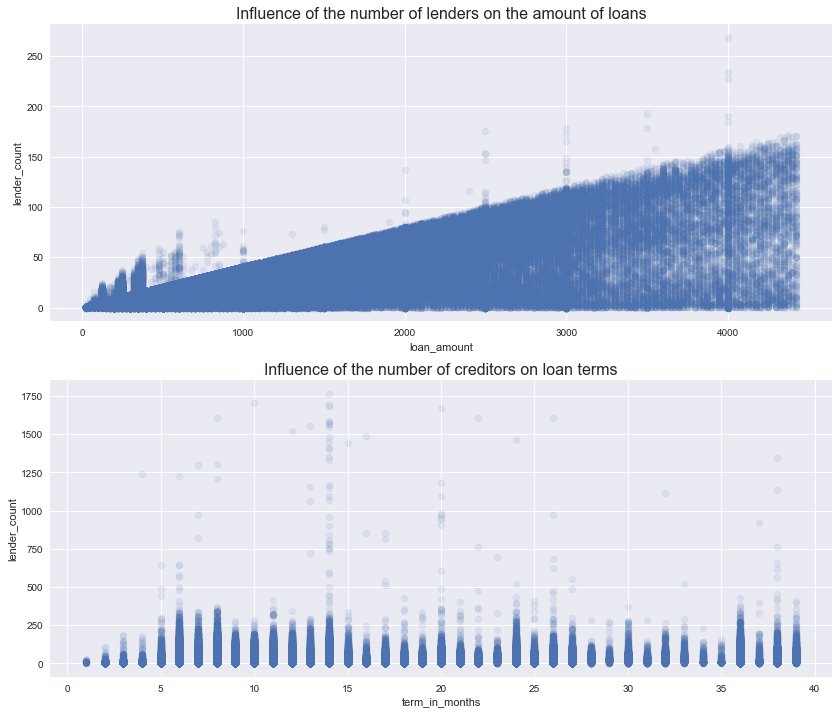

In [19]:
# Влияние такого атрибута займа как Количество кредиторов (lender_count) на суммы и сроки займов.

# Обрабатываем выбросы
d_la = df_loans[['lender_count','loan_amount']]
d_tim = df_loans[['lender_count','term_in_months']]

outliers_loan_amount = d_la[d_la['loan_amount'] > d_la['loan_amount'].mean() + 3 * d_la['loan_amount'].std()]
d_loan_amount = d_la.drop(outliers_loan_amount.index)

outliers_term_in_months = d_tim[d_tim['term_in_months'] > d_tim['term_in_months'].mean() + 3 * d_tim['term_in_months'].std()]
d_term_in_months = d_tim.drop(outliers_term_in_months.index)

# строим график
fig, ax = plt.subplots(nrows = 2, figsize=(14,12))

ax[0].scatter(d_loan_amount['loan_amount'], d_loan_amount['lender_count'], alpha=0.1)
ax[1].scatter(d_term_in_months['term_in_months'], d_term_in_months['lender_count'], alpha=0.1)

# Добавляем оформление
ax[0].set_title('Influence of the number of lenders on the amount of loans', fontsize=16)
ax[1].set_title('Influence of the number of creditors on loan terms', fontsize=16)
ax[0].set_xlabel('loan_amount')
ax[1].set_xlabel('term_in_months')
ax[0].set_ylabel('lender_count')
ax[1].set_ylabel('lender_count')

plt.subplots_adjust(wspace=0.5)

plt.show()

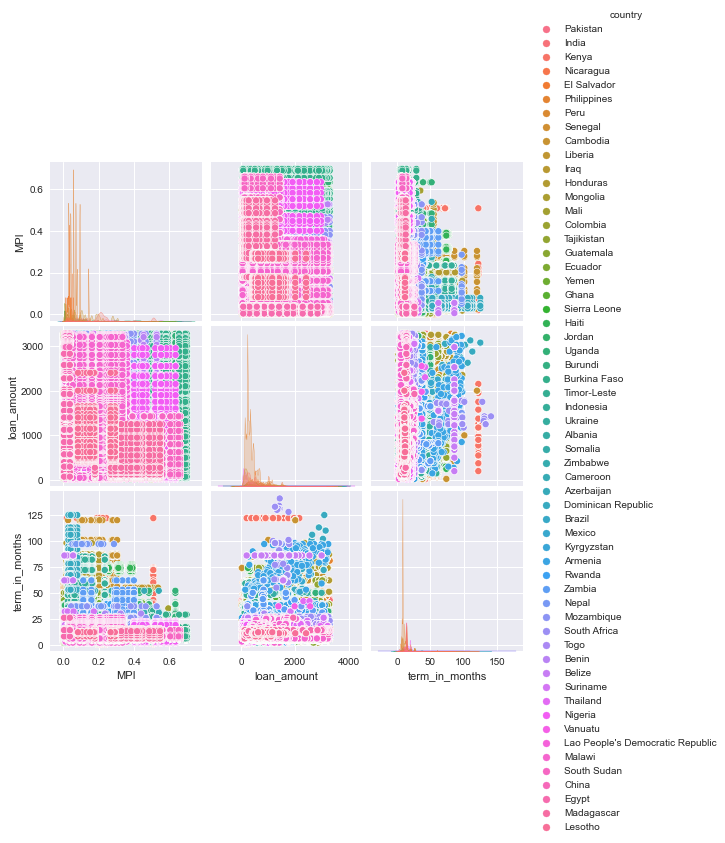

In [7]:
# Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.

#Обрабатываем выбросы по сумме займа
df_3 = data[['country' ,'MPI' ,'loan_amount' ,'term_in_months']]

outliers_loan_amount = df_3[df_3['loan_amount'] > df_3['loan_amount'].mean() + 3 * df_3['loan_amount'].std()]

df_3_loan_amount = df_3.drop(outliers_loan_amount.index)

# Переносим результаы на график
sns.pairplot(df_3_loan_amount, hue  = 'country')

plt.show()

<ipython-input-16-5771d00069dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['monthly payment'] = df_4['loan_amount'] / df_4['term_in_months']
<ipython-input-16-5771d00069dd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['funded_time'] = (pd.to_datetime(df_4['funded_time'], errors='coerce').dt.strftime("%Y-%m-%d"))


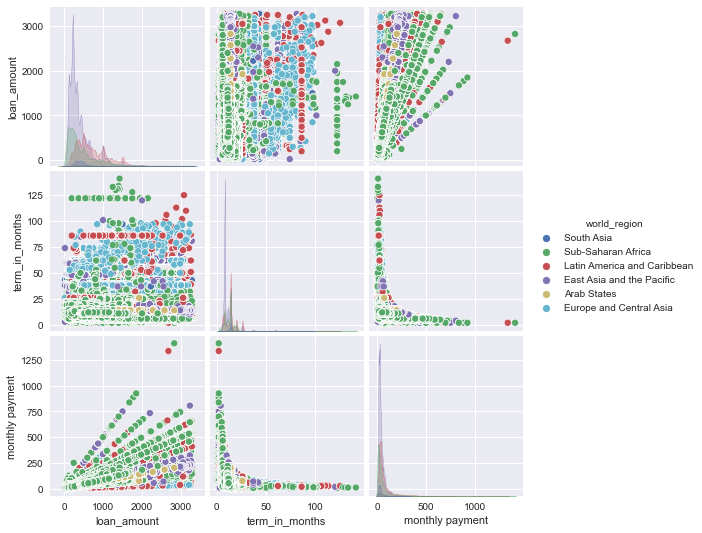

In [16]:
# Зависимости таких метрик как сумма займа, срок займа, время финансирования заявки, ежемесячный платеж в разрезе макрорегионов.

df_4 = data[['world_region', 'loan_amount','term_in_months', 'funded_time']]
df_4['monthly payment'] = df_4['loan_amount'] / df_4['term_in_months']

df_4['funded_time'] = (pd.to_datetime(df_4['funded_time'], errors='coerce').dt.strftime("%Y-%m"))
df_4['funded_time']

#Обрабатываем выбросы по сумме займа
outliers_loan_amount = df_4[df_4['loan_amount'] > df_4['loan_amount'].mean() + 3 * df_4['loan_amount'].std()]

df_4_loan_amount = df_4.drop(outliers_loan_amount.index)

# Переносим результаы на график
sns.pairplot(df_4_loan_amount, hue  = 'world_region')

plt.show()

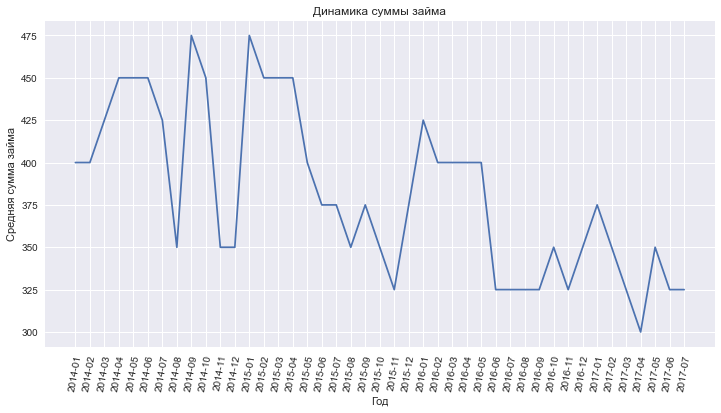

In [32]:
import warnings
warnings.filterwarnings('ignore')

df_4 = data[['world_region', 'loan_amount','term_in_months', 'funded_time']]
df_4['monthly payment'] = df_4['loan_amount'] / df_4['term_in_months']

df_4['funded_time'] = (pd.to_datetime(df_4['funded_time'], errors='coerce').dt.strftime("%Y-%m"))

df_5 = df_4.groupby('funded_time')['loan_amount'].median()

fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(data = df_5)

ax.set_title('Динамика суммы займа')
ax.set_xlabel('Год')
ax.set_ylabel('Средняя сумма займа')

plt.xticks(rotation=80)

plt.show()

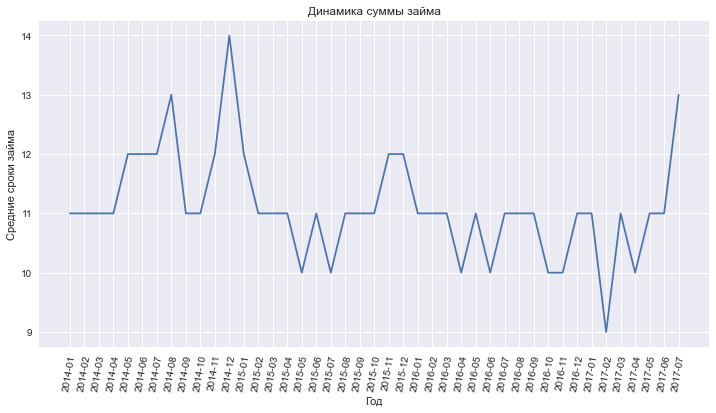

In [33]:
df_5 = df_4.groupby('funded_time')['term_in_months'].median()

fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(data = df_5)

ax.set_title('Динамика суммы займа')
ax.set_xlabel('Год')
ax.set_ylabel('Средние сроки займа')

plt.xticks(rotation=80)

plt.show()